# Imports

In [12]:
import pandas as pd

# Get the dataFrame

In [13]:
df = pd.read_csv('data/weblogs_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67152 entries, 0 to 67151
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  67152 non-null  object 
 1   NUMBER_OF_REQUESTS  67152 non-null  int64  
 2   TOTAL_DURATION      67152 non-null  int64  
 3   AVERAGE_TIME        67152 non-null  float64
 4   STANDARD_DEVIATION  52816 non-null  float64
 5   REPEATED_REQUESTS   67152 non-null  float64
 6   HTTP_RESPONSE_2XX   67152 non-null  float64
 7   HTTP_RESPONSE_3XX   67152 non-null  float64
 8   HTTP_RESPONSE_4XX   67152 non-null  float64
 9   HTTP_RESPONSE_5XX   67152 non-null  float64
 10  GET_METHOD          67152 non-null  float64
 11  POST_METHOD         67152 non-null  float64
 12  HEAD_METHOD         67152 non-null  float64
 13  OTHER_METHOD        67152 non-null  float64
 14  NIGHT               67152 non-null  float64
 15  UNASSIGNED          67152 non-null  float64
 16  IMAG

## Analyze & Visualize the data

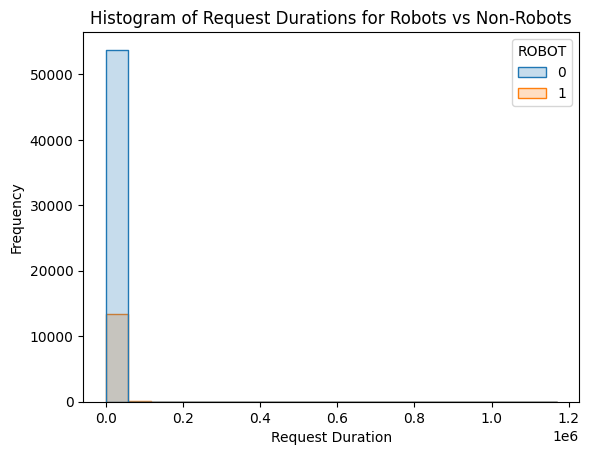

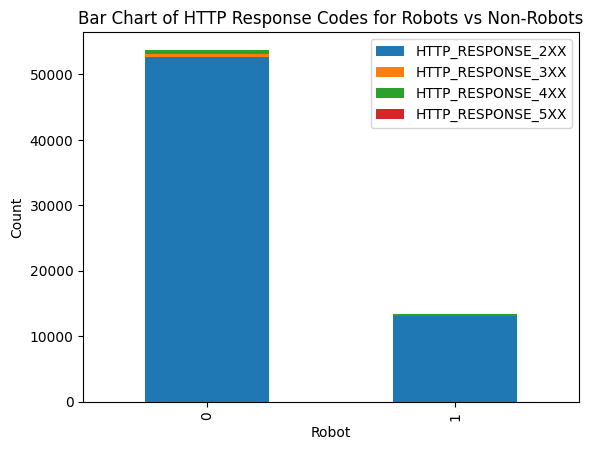

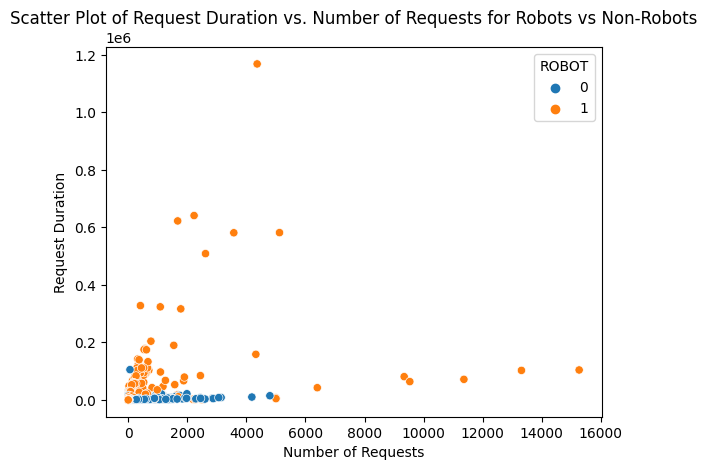

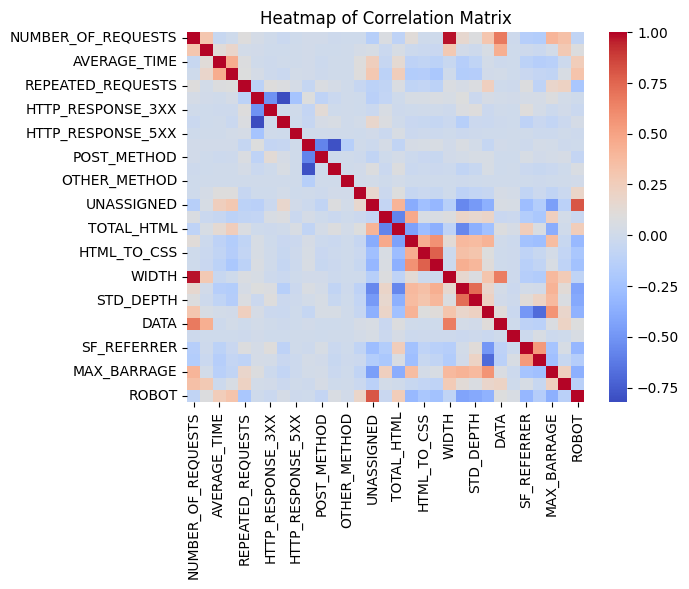

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of request durations for robots vs non-robots
sns.histplot(df, x="TOTAL_DURATION", hue="ROBOT", element="step", bins=20)
plt.xlabel("Request Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Request Durations for Robots vs Non-Robots")
plt.show()

# Create a bar chart of HTTP response codes for robots vs non-robots
counts = df.groupby("ROBOT")[["HTTP_RESPONSE_2XX", "HTTP_RESPONSE_3XX", "HTTP_RESPONSE_4XX", "HTTP_RESPONSE_5XX"]].sum()
counts.plot(kind="bar", stacked=True)
plt.xlabel("Robot")
plt.ylabel("Count")
plt.title("Bar Chart of HTTP Response Codes for Robots vs Non-Robots")
plt.show()

# Plot a scatter plot of request duration vs. number of requests for robots vs non-robots
sns.scatterplot(x="NUMBER_OF_REQUESTS", y="TOTAL_DURATION", hue="ROBOT", data=df)
plt.xlabel("Number of Requests")
plt.ylabel("Request Duration")
plt.title("Scatter Plot of Request Duration vs. Number of Requests for Robots vs Non-Robots")
plt.show()

corr = df.corr(numeric_only=True)
# Plot the heatmap
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

# Frame the problem

- Classes: 2, 0 = human, 1 = robot
- Model has to be binary & able to handle a lot of features
- Model has to be a classifier
- Choices:
    - Mini-batch Gradient Descent
    - Logistic Regression
    - Support Vector Machine
    - Random Forest
    - Decision Tree
    - Neural Network

# Create a test set & a training set

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

# Drop the ID column
df = df.drop(columns=["ID"])

# Split the data into training and test sets
X = df.drop(columns=["ROBOT"])
y = df["ROBOT"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60436, 30), (6716, 30), (60436,), (6716,))

# Create a pipeline

In [16]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

imputers = [
    ("median_imputer", SimpleImputer(strategy="median")),
    ("most_frequent_imputer", SimpleImputer(strategy="most_frequent")),
    ("constant_imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("mean_imputer", SimpleImputer(strategy="mean")),
    ("knn_imputer", KNNImputer(n_neighbors=5)),
]

scalers = [
    ("standard_scaler", StandardScaler()),
    ("minmax_scaler", MinMaxScaler()),
    ("maxabs_scaler", MaxAbsScaler()),
    ("robust_scaler", RobustScaler())
]

models = [
    ("mini_batch_gradient_descent", SGDClassifier()),
    ("logistic_regression", LogisticRegression(max_iter=500)),
    ("support_vector_machine", SVC()),
    ("random_forest", RandomForestClassifier()),
    ("decision_tree", DecisionTreeClassifier()),
]

pipelineResults = []
amount = len(imputers) * len(scalers) * len(models)

for imputer in imputers:
    for scaler in scalers:
        for model in models:

            print(f"Training... {len(pipelineResults)}/{amount}" + " " * 20, end="\r")

            # Create a pipeline
            pipeline = Pipeline([
                ("imputer", imputer[1]),
                ("scaler", scaler[1]),
                ("model", model[1])
            ])

            # Fit the pipeline
            pipeline.fit(X_train, y_train)

            # Get the training and test accuracy
            train_acc = pipeline.score(X_train, y_train)
            test_acc = pipeline.score(X_test, y_test)

            # Add the results to the dataframe
            pipelineResults.append(
                {
                    "Imputer": imputer[0],
                    "Scaler": scaler[0],
                    "Model": model[0],
                    "Training Accuracy": train_acc,
                    "Test Accuracy": test_acc
                }
            )

pipelineResults = pd.DataFrame(pipelineResults)
pipelineResults

,Imputer,Scaler,Model,Training Accuracy,Test Accuracy
0,median_imputer,standard_scaler,mini_batch_gradient_descent,0.945264,0.942079
1,median_imputer,standard_scaler,logistic_regression,0.946009,0.943716
2,median_imputer,standard_scaler,support_vector_machine,0.962771,0.958160
3,median_imputer,standard_scaler,random_forest,0.985075,0.975730
4,median_imputer,standard_scaler,decision_tree,0.992653,0.976027
...,...,...,...,...,...
95,knn_imputer,robust_scaler,mini_batch_gradient_descent,0.573863,0.575194
96,knn_imputer,robust_scaler,logistic_regression,0.562612,0.562835
97,knn_imputer,robust_scaler,support_vector_machine,0.802336,0.791543
98,knn_imputer,robust_scaler,random_forest,0.993994,0.979750


In [19]:
pipelineResults.sort_values(by="Test Accuracy", ascending=False, inplace=True)
pipelineResults

,Imputer,Scaler,Model,Training Accuracy,Test Accuracy
18,median_imputer,robust_scaler,random_forest,0.993994,0.980197
98,knn_imputer,robust_scaler,random_forest,0.993994,0.979750
58,constant_imputer,robust_scaler,random_forest,0.993977,0.979750
78,mean_imputer,robust_scaler,random_forest,0.993994,0.979303
38,most_frequent_imputer,robust_scaler,random_forest,0.993961,0.979303
...,...,...,...,...,...
36,most_frequent_imputer,robust_scaler,logistic_regression,0.562612,0.562835
16,median_imputer,robust_scaler,logistic_regression,0.562628,0.562835
56,constant_imputer,robust_scaler,logistic_regression,0.562612,0.562835
96,knn_imputer,robust_scaler,logistic_regression,0.562612,0.562835


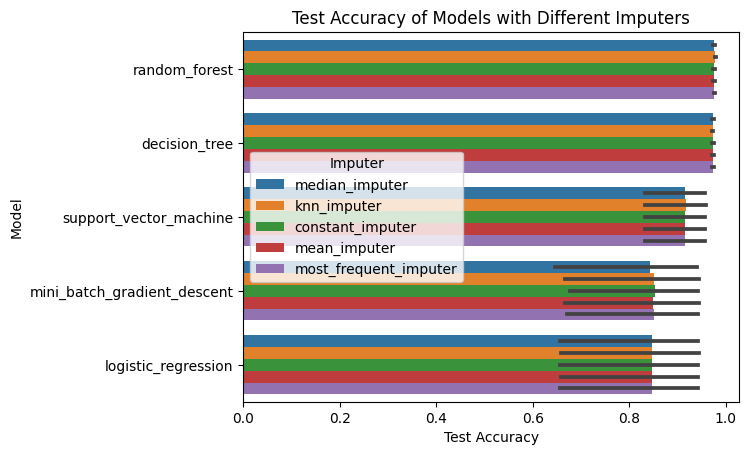

In [20]:
# Plot the results
sns.barplot(x="Test Accuracy", y="Model", hue="Imputer", data=pipelineResults)
plt.xlabel("Test Accuracy")
plt.ylabel("Model")
plt.title("Test Accuracy of Models with Different Imputers")
plt.show()

# Fine-tune the best model

In [26]:
best_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("model", RandomForestClassifier())
])


# Create a grid of hyperparameters
param_grid = {
    "model__n_estimators": [10, 50, 100, 200],
    "model__max_depth": [None, 5, 10, 20],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
}

from sklearn.model_selection import GridSearchCV

# Create the grid search
grid_search = GridSearchCV(best_pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
grid_search.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'model__max_depth': 20,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

# Evaluate the system on the test set

Training Accuracy: 0.9881858494936793
Test Accuracy: 0.9787075640262061
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5317
           1       0.94      0.95      0.95      1399

    accuracy                           0.98      6716
   macro avg       0.97      0.97      0.97      6716
weighted avg       0.98      0.98      0.98      6716



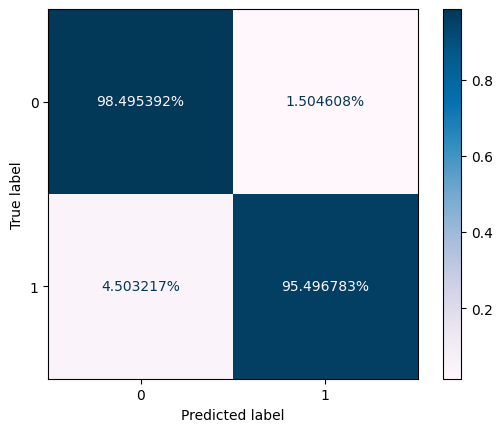

In [27]:
# Train based on the best parameters
best_pipeline = grid_search.best_estimator_
best_pipeline.fit(X_train, y_train)

# Get the training and test accuracy
train_acc = best_pipeline.score(X_train, y_train)
test_acc = best_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

# Get the predictions
y_pred = best_pipeline.predict(X_test)

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

predictions = best_pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, predictions))

# Plot the confusion matrix with percentage values
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        normalize="true", values_format=".6%", cmap="PuBu")
